Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the dataset

In [4]:
dataset = pd.read_csv('Random_Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
dataset.shape

(30, 2)

Data Pre-processing

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


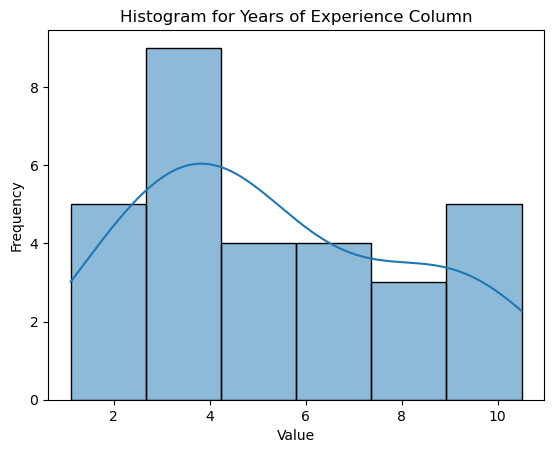

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['YearsExperience'], kde=True)
plt.title('Histogram for Years of Experience Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

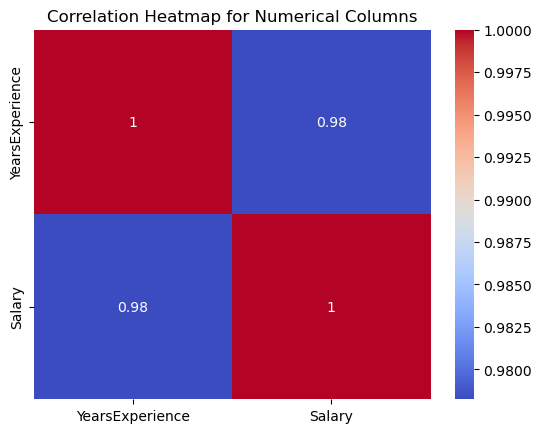

In [10]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

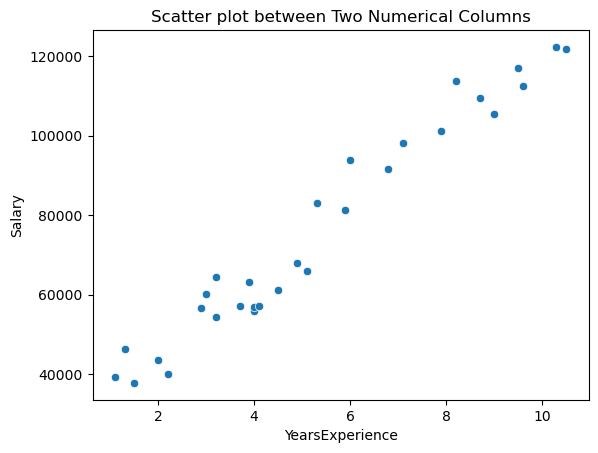

In [41]:
sns.scatterplot(data=dataset, x='YearsExperience', y='Salary')
plt.title('Scatter plot between Two Numerical Columns')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Descriptive statistics of the dataset:

In [11]:
numerical_stats = dataset.describe()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

Descriptive Statistics for Numerical Columns:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


Checking for missing values:

In [12]:
missing_values = dataset.isna().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
YearsExperience    0
Salary             0
dtype: int64


Splitting into dependent and independent variables

In [8]:
X = dataset.iloc[:,:-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector

<AxesSubplot:>

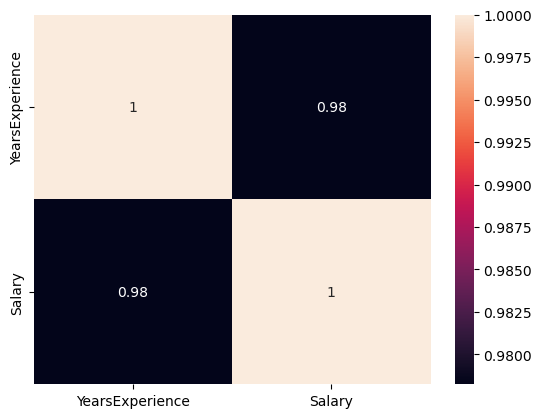

In [38]:
sns.heatmap(dataset.corr(),annot=True)

Train and test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [29]:
X_train.shape

(20, 1)

In [30]:
X_test.shape

(10, 1)

In [31]:
y_train.shape

(20,)

Fitting linear regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predicting the test results:

In [15]:
y_pred = regressor.predict(X_test) 
y_pred #predicted salaries

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [28]:
y_test #real salary of the test set.

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

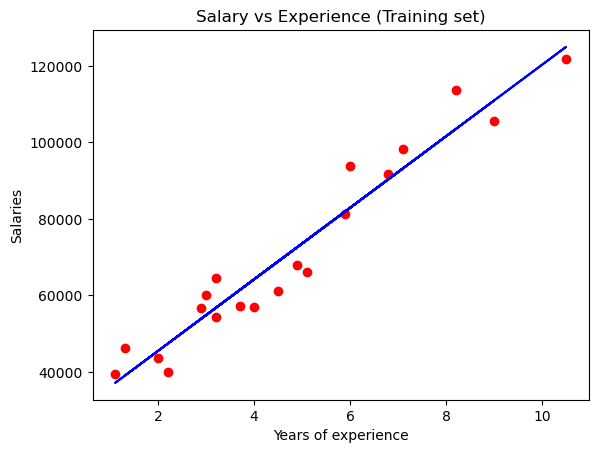

In [34]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show()

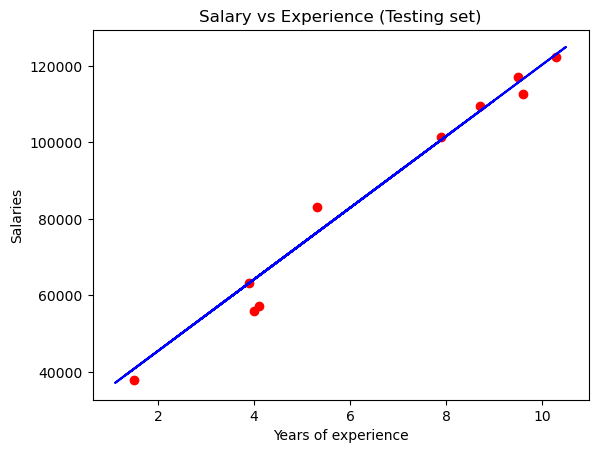

In [35]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Testing set)")
 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 